In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme('paper')

# import astropy.constants as const
# import astropy.units as u
# from astropy.visualization import quantity_support
# quantity_support()

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Simhei']  #显示中文
plt.rcParams['axes.unicode_minus']=False    #显示负号
%config InlineBackend.figure_format = 'retina'
# plt.style.use('ggplot')
# plt.rcParams['text.usetex'] = True

import os
path='./figs/'
os.makedirs(path,exist_ok=True) 

# 示波器波形

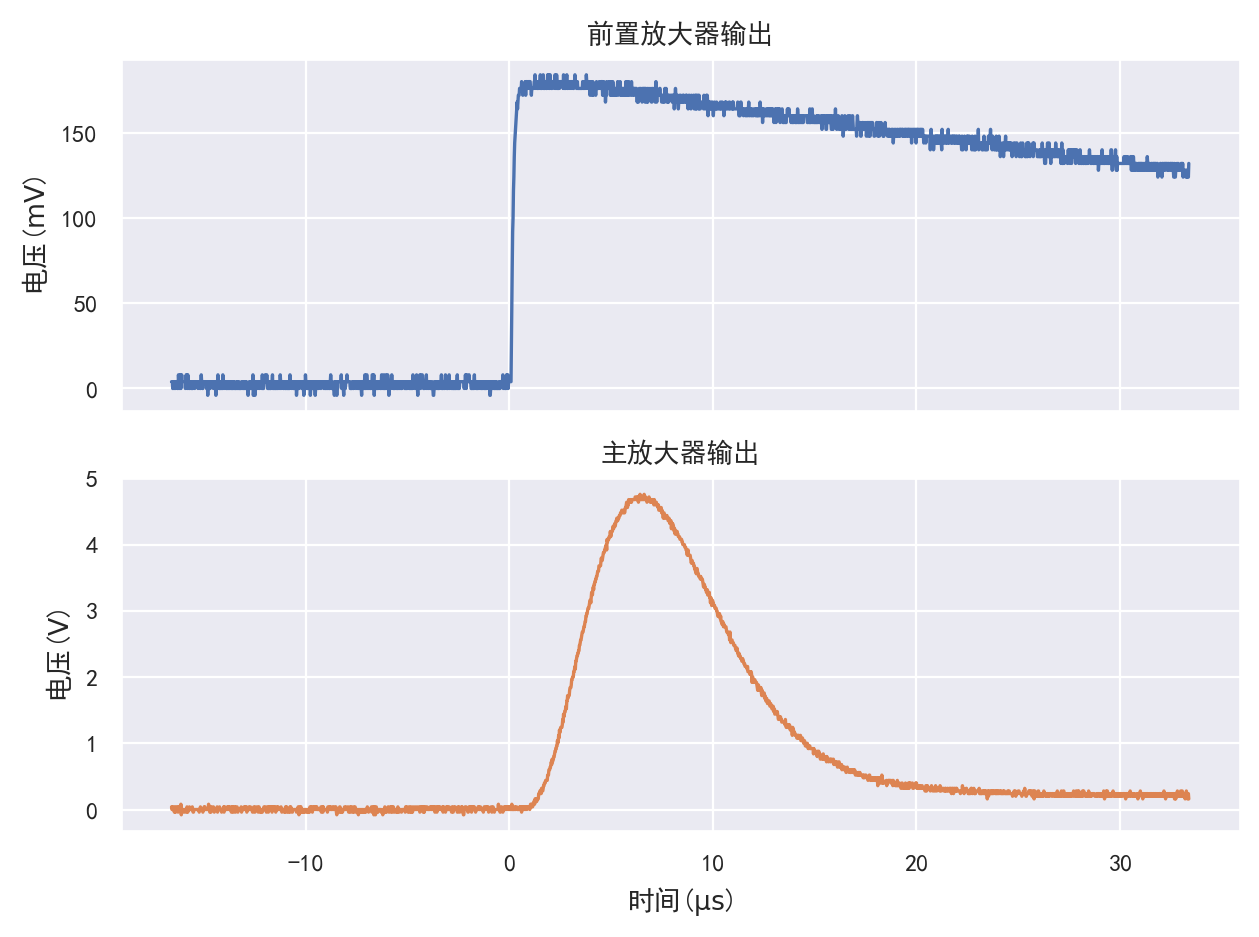

In [43]:
CH1 = pd.read_csv('./data/TEK0000.CSV',header=None)
CH2 = pd.read_csv('./data/TEK0001.CSV',header=None)
oscilloscope = pd.DataFrame({'T_data':CH1[3]*1e6,
                             'CH1_data':CH1[4]*1e3,
                             'CH2_data':CH2[4]})
axes = oscilloscope.plot(x = 'T_data',subplots = True,legend=False)
fig = axes[0].get_figure()
axes[-1].set_xlabel(r'时间(${\rm \mu s}$)')
axes[0].set_ylabel(r'电压(${\rm mV}$)')
axes[0].set_title('前置放大器输出')
axes[1].set_ylabel(r'电压(${\rm V}$)')
axes[1].set_title('主放大器输出')
fig.tight_layout()
fig.savefig(path + 'oscilloscope.pdf')

In [50]:
datapath ='./data/zxtql/'
files = os.listdir(datapath)

txtfiles = []
for file in files:
    _,extension= os.path.splitext(file)
    if extension=='.txt':
        txtfiles.append(file)

txtfiles.sort(key = lambda x:eval(os.path.splitext(x)[0]))
txtfiles

['5.txt',
 '10.txt',
 '20.txt',
 '30.txt',
 '60.txt',
 '80.txt',
 '100.txt',
 '120.txt']

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >], dtype=object)

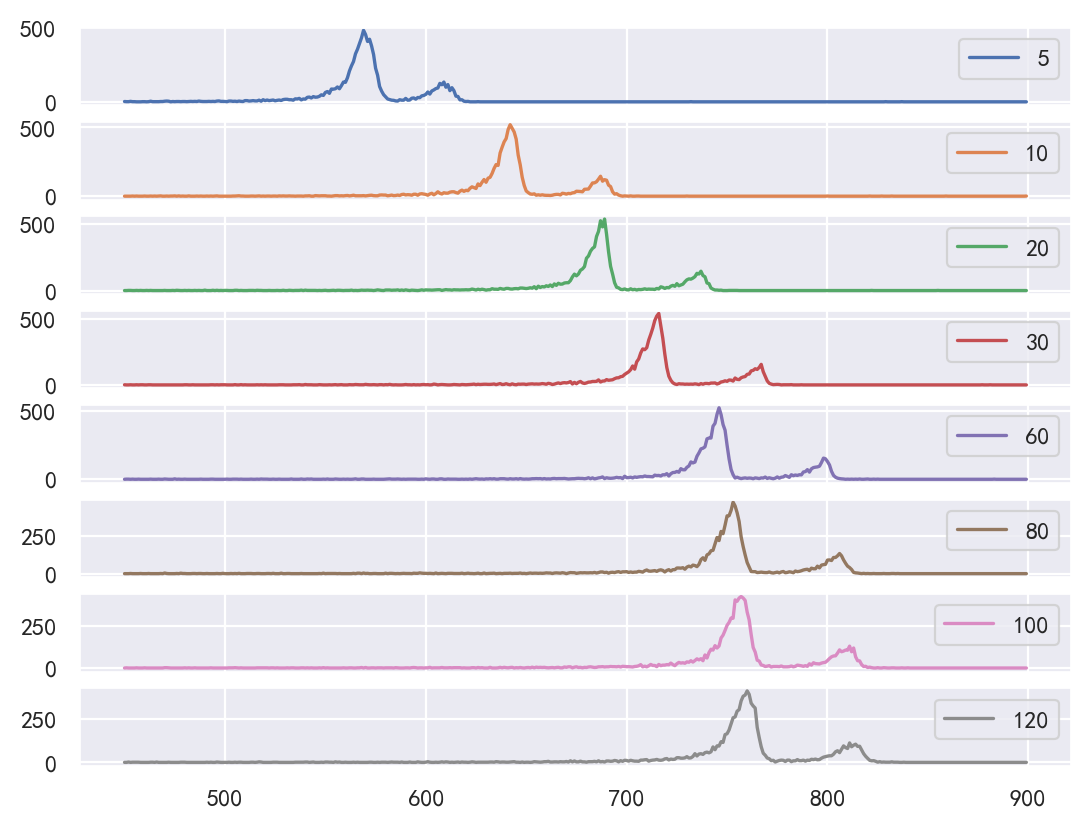

In [82]:
data_dict = {eval(os.path.splitext(txtfile)[0]):pd.read_csv(datapath+txtfile, sep='\t')['1'].values \
             for txtfile in txtfiles}
data1 = pd.DataFrame(data_dict)
data1.iloc[450:900].plot(subplots=True)

In [74]:
data1[5]

0       0
1       0
2       0
3       0
4       0
       ..
1019    0
1020    0
1021    0
1022    0
1023    0
Name: 5, Length: 1024, dtype: int64